In [19]:
import joblib
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

In [23]:
preprocessor = joblib.load("preprocessor.joblib")
X_train, X_test, y_train, y_test = joblib.load("splits.joblib")

ROC AUC: 0.9584371237861398
              precision    recall  f1-score   support

           0      0.915     0.999     0.955      1801
           1      0.994     0.486     0.653       327

    accuracy                          0.921      2128
   macro avg      0.954     0.743     0.804      2128
weighted avg      0.927     0.921     0.909      2128



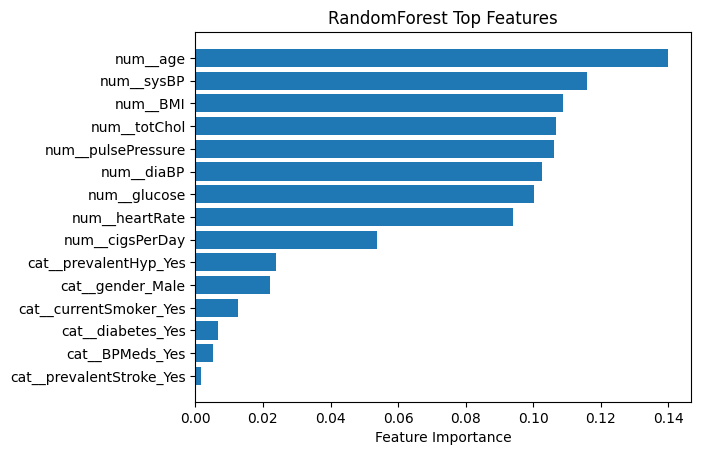

In [24]:
# Pipeline: preprocessor + RandomForest
rf_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=200,       # number of trees
        max_depth=None,         # let it grow deep (tune later)
        random_state=42,
        class_weight="balanced" # handle imbalance
    ))
])

# Train
rf_clf.fit(X_train, y_train)

# Predict
y_pred = rf_clf.predict(X_test)
y_proba = rf_clf.predict_proba(X_test)[:, 1]

# Evaluate
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred, digits=3))

# Feature importance
import matplotlib.pyplot as plt
import numpy as np

importances = rf_clf.named_steps["classifier"].feature_importances_
feat_names = rf_clf.named_steps["preprocessor"].get_feature_names_out()

indices = np.argsort(importances)[::-1][:15]
plt.barh(range(len(indices)), importances[indices][::-1])
plt.yticks(range(len(indices)), [feat_names[i] for i in indices][::-1])
plt.xlabel("Feature Importance")
plt.title("RandomForest Top Features")
plt.show()

In [25]:
from sklearn.metrics import precision_recall_curve

y_proba = rf_clf.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Example: use threshold 0.3
y_pred_thresh = (y_proba >= 0.3).astype(int)
print(classification_report(y_test, y_pred_thresh, digits=3))

              precision    recall  f1-score   support

           0      0.960     0.972     0.966      1801
           1      0.836     0.777     0.805       327

    accuracy                          0.942      2128
   macro avg      0.898     0.874     0.886      2128
weighted avg      0.941     0.942     0.941      2128



In [15]:
joblib.dump(rf_clf, "heart_rf_pipeline.pkl")

['heart_rf_pipeline.pkl']